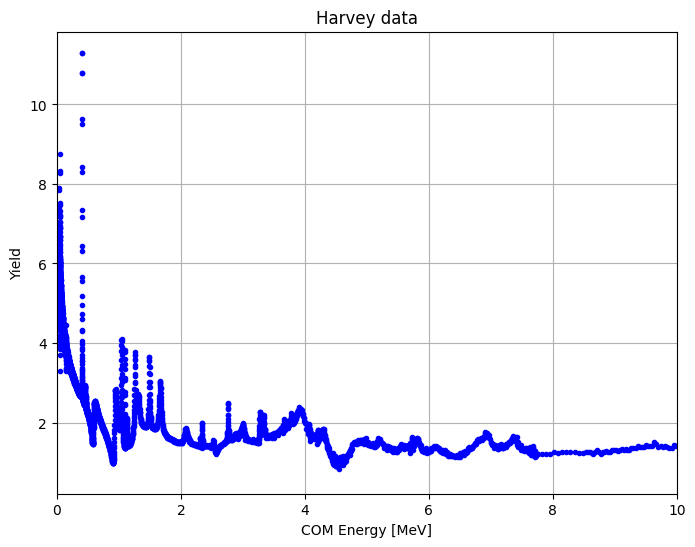

In [14]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# Read in the Harvey data
df = pd.read_csv('data/Harvey_14N_n_TOT.dat', delimiter='\t', header=None)

# Fix the data. The data file is lab frame, while the AZURE2 output data file is CoM frame
# E_cm = E_lab (M_light + M_heavy)/M_heavy; do this to convert lab to CoM, E_lab=df[]
# Neutron mass, projectile
M_light= 939.565 #MeV/c^2

#14N Mass, target
#In amu: 14.0030740, from: https://atom.kaeri.re.kr/cgi-bin/nuclide?nuc=N14
M_heavy= (14.0030740)*(931.49432)

# Extract the first and third columns
harvey_data_energy = df[0]*M_heavy/(M_light+M_heavy)  # First column
harvey_data_yield = df[2]  # Third column

# Plot
plt.figure(figsize=(8, 6))
plt.xlim(0, 10)
plt.plot(harvey_data_energy, harvey_data_yield, marker='.', linestyle='', color='b')
plt.xlabel('COM Energy [MeV]')
plt.ylabel('Yield')
plt.title('Harvey data')
plt.grid(True)
plt.show()


In [8]:
# Define the file path for the Elbe data
elbe_data_file = 'data/ELBE_ntot.dat'

# Define the file paths for AZURE2 Elbe calculation
elbe_file1 = 'output/Elbe_AZUREOut_aa=2_R=1.out' 
elbe_file2 = 'output/Elbe_AZUREOut_aa=2_R=2.out' 
elbe_file3 = 'output/Elbe_AZUREOut_aa=2_R=3.out' 

# Define the file paths for the AZURE2 Harvey calculation
harvey_file1 = 'output/Harvey_AZUREOut_aa=2_R=1.out'
harvey_file2 = 'output/Harvey_AZUREOut_aa=2_R=2.out'
harvey_file3 = 'output/Harvey_AZUREOut_aa=2_R=3.out'

# Load each file with pandas
elbe_data_df = pd.read_csv(elbe_data_file,  sep=r'\s+', header=None, skiprows=0)

elbe_df1 = pd.read_csv(elbe_file1, sep=r'\s+', header=None) 
elbe_df2 = pd.read_csv(elbe_file2, sep=r'\s+', header=None) 
elbe_df3 = pd.read_csv(elbe_file3, sep=r'\s+', header=None) 

harvey_df1 = pd.read_csv(harvey_file1, sep=r'\s+', header=None)
harvey_df2 = pd.read_csv(harvey_file2, sep=r'\s+', header=None)
harvey_df3 = pd.read_csv(harvey_file3, sep=r'\s+', header=None)

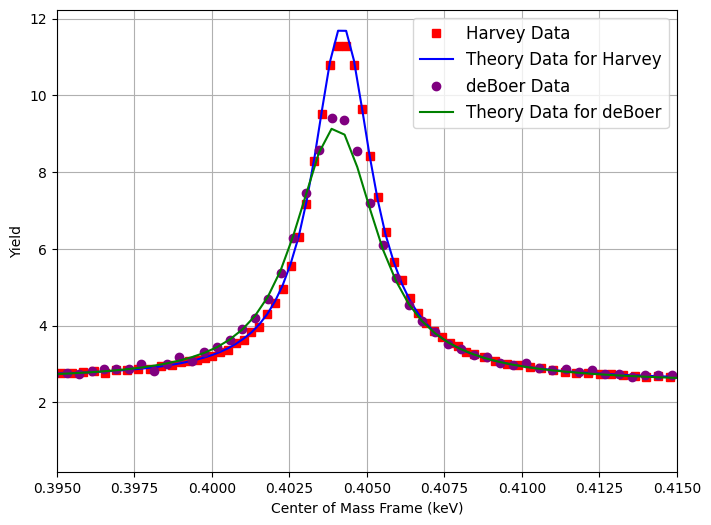

In [11]:
# Extract the first column from the first file and the fourth column from all three files
# The three different files are the three different channels 
# Really only the second channel contributes
# This is for the Harvey files
xharv_azure = harvey_df1[0]
yharv_azure = harvey_df1[3] + harvey_df2[3] + harvey_df3[3]

# Extract the first column from the first file and the fourth column from all three files
# The three different files are the three different channels 
# Really only the second channel contributes
# This is for the Elbe files
xelbe_azure = elbe_df1[0] 
yelbe_azure = elbe_df1[3] + elbe_df2[3] + elbe_df3[3] 

# Pull in the Elbe data and convert from lab frame to COM and from MeV to keV
elbe_data_energy = (elbe_data_df[0]*M_heavy/(M_light+M_heavy)/10**3)*1000 #Multiplied by 1000 to convert from MeV to keV
elbe_data_yield = elbe_data_df[2]

# Plot
plt.figure(figsize=(8, 6))
plt.xlim([0.395,0.415])

plt.plot(harvey_data_energy, harvey_data_yield, marker='s', linestyle='', label='Harvey Data', color='red') #Harvey data
plt.plot(xharv_azure, yharv_azure, linestyle='-', label='Theory Data for Harvey', color='b') #Theory Harvey
plt.plot(elbe_data_energy, elbe_data_yield, marker='o', linestyle='', label='deBoer Data', color='purple') #deBoer data   
plt.plot(xelbe_azure, yelbe_azure, linestyle='-', label='Theory Data for deBoer', color='g') #Theory deBoer

plt.xlabel('Center of Mass Frame (keV)')
plt.ylabel('Yield')
plt.legend(loc='upper right', fontsize='large')
plt.grid(True)
plt.show()
